In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
from src.utilities import *
file_directory = "//Users//joancaceres//Documents//FERBO//FB_W10_S4//run2//FBW10S4_"

In [150]:
data = load_data(file_directory + str(515958))
parameters = data['parameters']

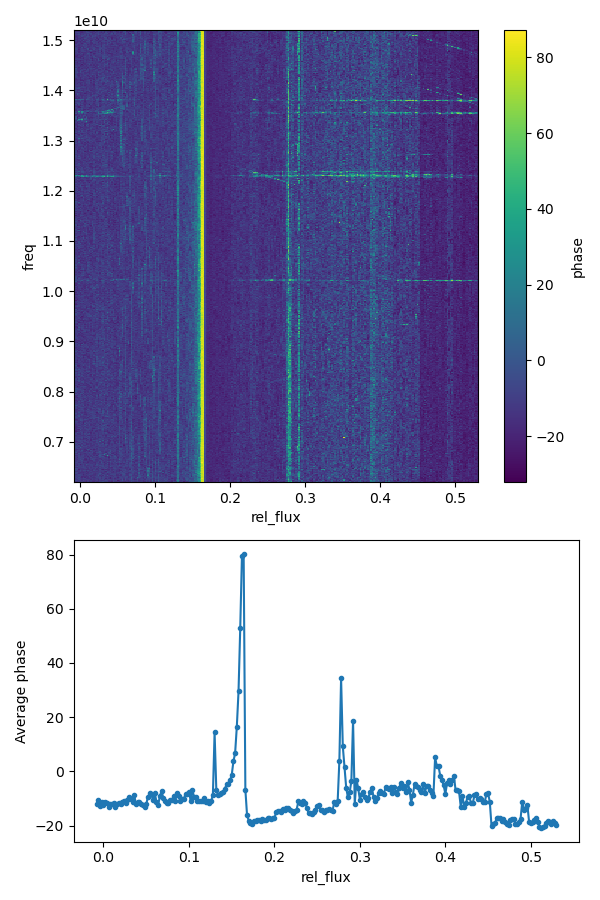

In [151]:
fig,ax = plt.subplots(2,1, figsize=(6,9),sharex=False, gridspec_kw={'height_ratios': [1.5,1]})
plot3D(
    data_dict=data,
    x_key='rel_flux',
    y_key='freq',
    z_key='phase',
    flatten_vertical=0,
    fig=fig,
    ax=ax[0]
)

# ax[0].set_xlim(right=1.6)

idx = np.abs(data['freq'][0,:]-9e9).argmin()
# ax[1].plot(data['rel_flux'], data['phase'][:,idx], label=f"freq = {data['freq'][0,idx]*1e-9} GHz")
ax[1].plot(data['rel_flux'], np.mean(data['phase'],axis=1),'o-',markersize=3)
ax[1].set_xlabel('rel_flux')
ax[1].set_ylabel('Average phase')
# ax[1].legend()

fig.tight_layout()
plt.show()

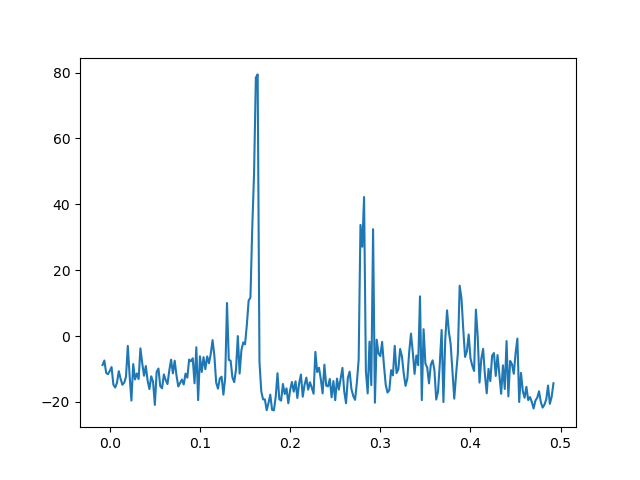

In [115]:
fig,ax = plt.subplots(1,1)

plt.show()

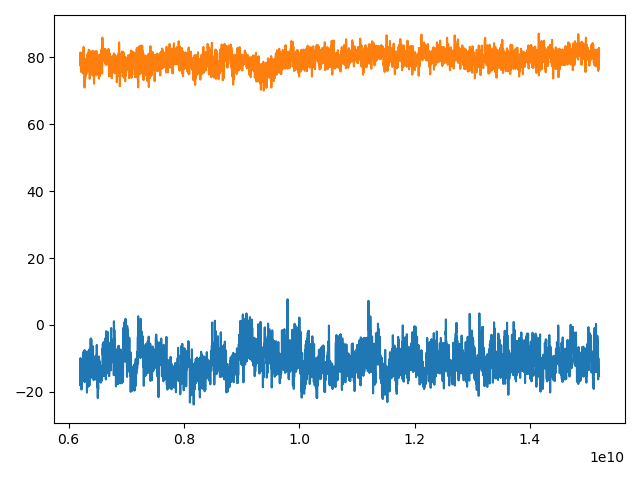

In [111]:
fig, ax = plt.subplots(1,1)
idx = np.abs(data['rel_flux']-0.12629).argmin()
idx2 = np.abs(data['rel_flux']-0.16272).argmin()
ax.plot(data['freq'][idx], data['phase'][idx])
ax.plot(data['freq'][idx2], data['phase'][idx2])
fig.tight_layout()
plt.show()

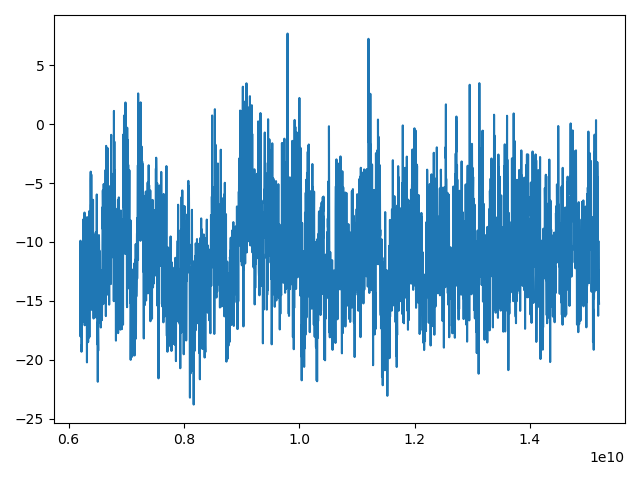

In [ ]:
fig, ax = plt.subplots(1,1)
rel_flux = 0.12629
idx = np.abs(data['rel_flux']-rel_flux).argmin()
ax.plot(data['freq'][idx], data['phase'][idx])
fig.tight_layout()
plt.show()

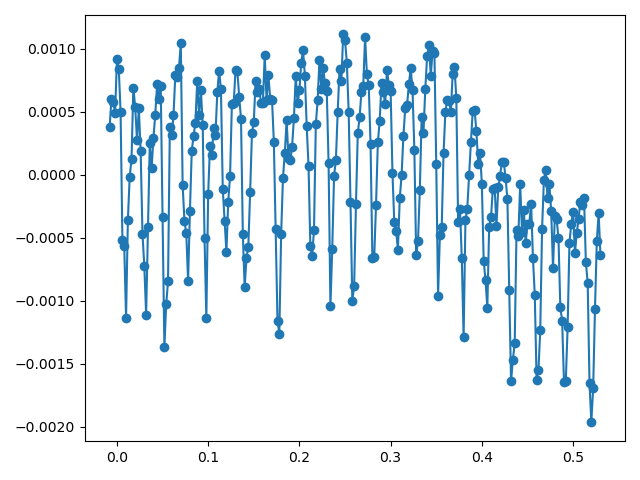

In [152]:
fig,ax = plt.subplots(1,1)
y = data['flux']-data['rel_flux']
# ax.plot(data['elapse_time']/3600,y - np.mean(y),'o-')
ax.plot(data['rel_flux'],y - np.mean(y),'o-')
fig.tight_layout()
plt.show()

In [72]:
sts = {}
sts[516969] = load_data(file_directory + str(516969))
sts[516970] = load_data(file_directory + str(516970))
sts[516971] = load_data(file_directory + str(516971))
sts[516972] = load_data(file_directory + str(516972))

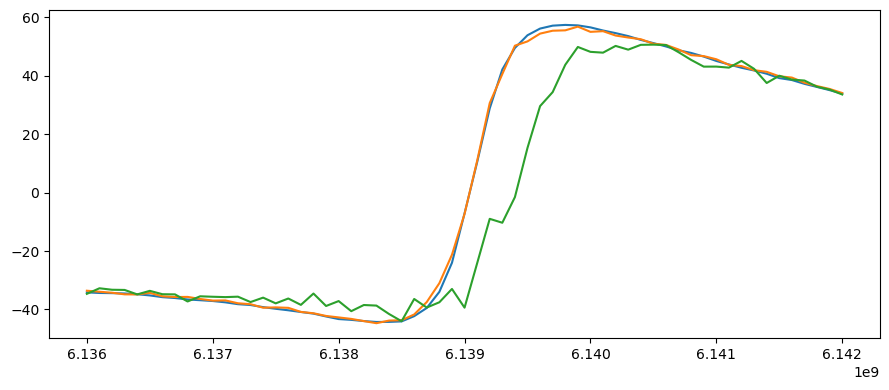

In [73]:
fig,ax = plt.subplots(1,1, figsize=(9,4))
ax.plot(sts[516969]['freq'],sts[516969]['phase'])
ax.plot(sts[516970]['freq'],sts[516970]['phase'])
ax.plot(sts[516972]['freq'],sts[516972]['phase'])

fig.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 3) (395799695.py, line 3)

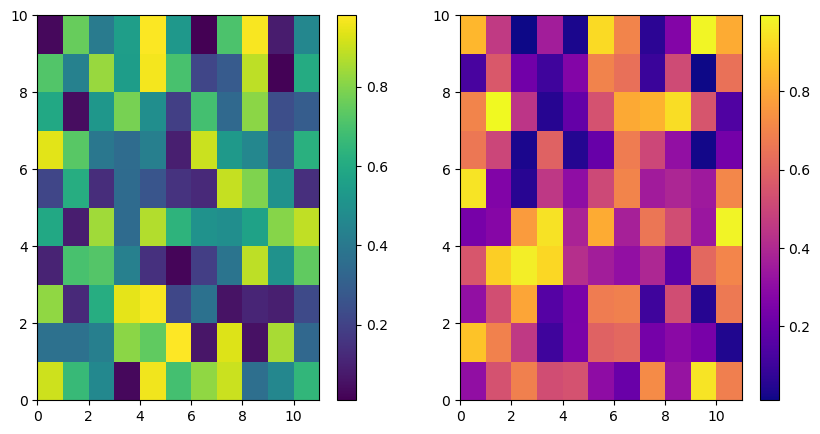

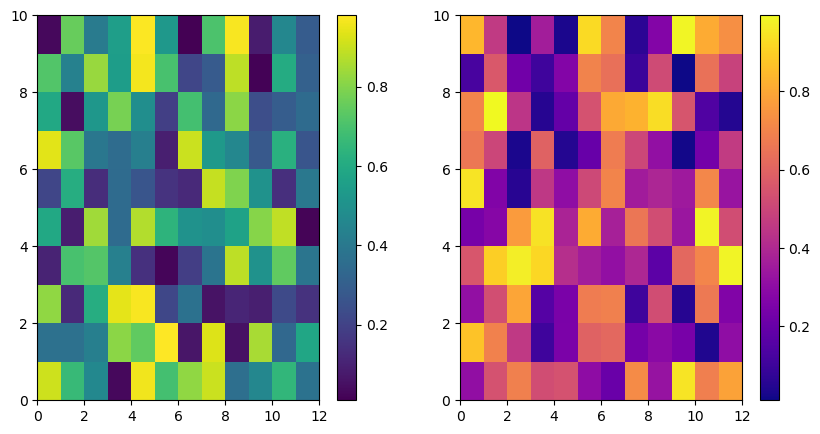

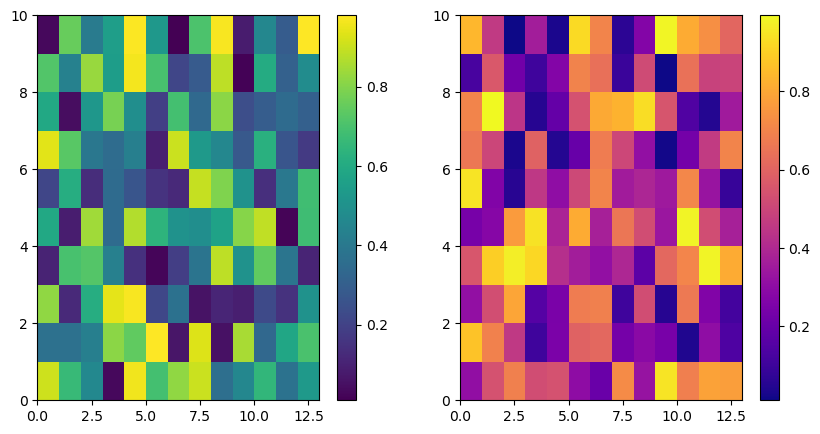

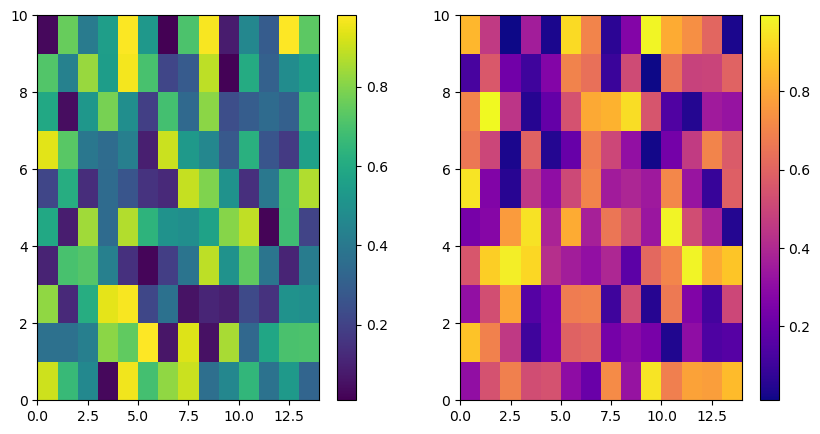

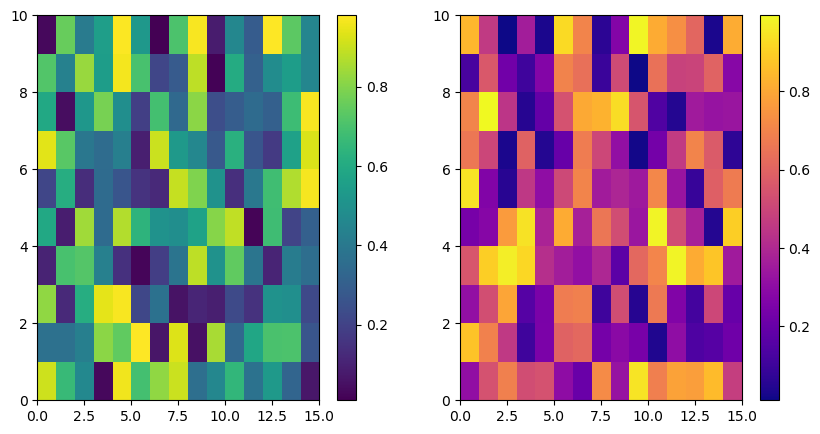

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Datos iniciales
data1 = np.random.rand(10, 10)
data2 = np.random.rand(10, 10)

# Función de actualización
def update_data(data):
    new_col = np.random.rand(10, 1)
    return np.hstack((data, new_col))

# Loop de actualización
for _ in range(5):
    data1 = update_data(data1)
    data2 = update_data(data2)

    # Crear figura y subgráficos
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Crear los pcolormesh con su mapa de color
    cmap1 = plt.get_cmap('viridis')
    cmap2 = plt.get_cmap('plasma')
    
    p1 = axs[0].pcolormesh(data1, cmap=cmap1)
    p2 = axs[1].pcolormesh(data2, cmap=cmap2)
    
    # Añadir barras de color
    fig.colorbar(p1, ax=axs[0])
    fig.colorbar(p2, ax=axs[1])
    
    plt.pause(1)  # Pausar para ver la actualización
    plt.close(fig)  # Cerrar la figura anterior para evitar sobrecarga

plt.show()

In [6]:
import tkinter as tk
from tkinter import ttk

class LoopControlApp:
    def __init__(self, root, array, loop_logic):
        self.root = root
        self.root.title("Control de Loop en Tiempo Real")

        self.array = array
        self.index = 0
        self.step = 1
        self.reverse = False
        self.max_range = len(self.array)
        self.running = False
        self.loop_logic = loop_logic

        self.display_label = ttk.Label(self.root, text=self.array[:self.max_range])
        self.display_label.pack(pady=10)

        self.value_label = ttk.Label(self.root, text=f"Valor actual: {self.array[self.index]}")
        self.value_label.pack(pady=10)

        controls_frame = ttk.Frame(self.root)
        controls_frame.pack(pady=10)

        self.start_button = ttk.Button(controls_frame, text="Start", command=self.start_loop)
        self.start_button.grid(row=0, column=0, padx=5)

        self.stop_button = ttk.Button(controls_frame, text="Stop", command=self.stop_loop)
        self.stop_button.grid(row=0, column=1, padx=5)

        self.increment_step_button = ttk.Button(controls_frame, text="Duplicar Step", command=lambda: self.change_step(2))
        self.increment_step_button.grid(row=1, column=0, padx=5)

        self.decrement_step_button = ttk.Button(controls_frame, text="Dividir Step", command=lambda: self.change_step(0.5))
        self.decrement_step_button.grid(row=1, column=1, padx=5)

        self.extend_range_button = ttk.Button(controls_frame, text="Extender Rango", command=self.extend_range)
        self.extend_range_button.grid(row=2, column=0, padx=5)

        self.reverse_button = ttk.Button(controls_frame, text="Revertir", command=self.reverse_loop)
        self.reverse_button.grid(row=2, column=1, padx=5)

    def display_array(self):
        self.display_label.config(text=self.array[:self.max_range])

    def change_step(self, factor):
        self.step *= factor
        if self.step < 1:
            self.step = 1
        print(f"Step cambiado a: {self.step}")

    def extend_range(self):
        # Extiende el rango del array en el mismo step
        last_value = self.array[-1]
        extension = list(range(last_value + self.step, last_value + (20 * self.step), self.step))
        self.array.extend(extension)
        self.max_range = len(self.array)
        self.display_array()
        print(f"Rango extendido a: {self.max_range}")

    def reverse_loop(self):
        self.reverse = not self.reverse
        print(f"Loop revertido: {self.reverse}")

    def loop(self):
        if self.running:
            self.loop_logic(self.array, self.index)
            if self.reverse:
                self.index -= self.step
                if self.index < 0:
                    self.index = len(self.array) - 1
            else:
                self.index += self.step
                if self.index >= len(self.array):
                    self.index = 0

            self.value_label.config(text=f"Valor actual: {self.array[self.index]}")
            self.root.after(1000, self.loop)

    def start_loop(self):
        if not self.running:
            self.running = True
            self.loop()

    def stop_loop(self):
        self.running = False

if __name__ == "__main__":
    # Define los valores de inicio, fin y paso
    start = 0
    stop = 100
    step = 1
    array = list(range(start, stop, step))

    # Define la lógica que quieres que se ejecute dentro del loop
    def custom_loop_logic(array, index):
        # Aquí puedes definir lo que quieras hacer con array y index en cada iteración
        print('hola')
        print(f"Lógica del loop: {array[index]}")

    root = tk.Tk()
    app = LoopControlApp(root, array, custom_loop_logic)
    root.mainloop()

hola
Lógica del loop: 0
hola
Lógica del loop: 1
hola
Lógica del loop: 2
hola
Lógica del loop: 3
hola
Lógica del loop: 4
hola
Lógica del loop: 5
hola
Lógica del loop: 6


In [19]:
import numpy as np

def centered_intercalated_array(center, step, num_points=None, span=None):
    """
    Generate an array centered around a given value, intercalating steps to the right and left.
    
    Parameters:
    center (float): The central value around which the array is centered.
    step (float): The step size between consecutive values.
    num_points (int, optional): The total number of points in the array.
    span (float, optional): The total span of the array.
    
    Returns:
    numpy.ndarray: The generated intercalated array.
    
    Raises:
    ValueError: If both 'num_points' and 'span' are provided, or if neither is provided.
                If the span is too small to generate the required number of points.
    """
    if num_points is not None and span is not None:
        raise ValueError("Specify either 'num_points' or 'span', not both.")
    
    if num_points is None and span is None:
        raise ValueError("You must specify either 'num_points' or 'span'.")
    
    if span is not None:
        num_points = int(span / step) + 1
        if num_points < 2:
            raise ValueError("The span is too small to generate the required number of points.")
    
    # Create indices alternating between right and left of the center
    indices = np.arange(num_points // 2 + 1)
    intercalated_indices = np.zeros(num_points, dtype=int)
    intercalated_indices[0::2] = indices
    intercalated_indices[1::2] = -indices[1:num_points // 2 + 1]
    
    # Calculate the intercalated array values
    intercalated_values = center + step * intercalated_indices
    return intercalated_values

# Ejemplo de uso
center = 10.0
step = 0.5
num_points = 11  # O puede usar span en lugar de num_points
# span = 5.0

flux_array = centered_intercalated_array(center, step, span=1)
print(flux_array)

<class 'numpy.ndarray'>
